### Import Liabraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Dataset Uploading

In [2]:
df=pd.read_csv('Loan_Default.csv')

In [3]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


### Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
df.shape

(148670, 34)

In [5]:
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [6]:
df=df.drop('age',axis=1)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
s_imputer=SimpleImputer(strategy='mean')
df[['rate_of_interest','Interest_rate_spread','Upfront_charges','LTV','property_value','income','dtir1']]=s_imputer.fit_transform(df[['rate_of_interest','Interest_rate_spread','Upfront_charges','LTV','property_value','income','dtir1']])

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1   

In [12]:
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
s

In [13]:
df.shape

(143942, 33)

In [14]:
df.head(2)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,credit_type,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,1740.0,EXP,758,CIB,to_inst,98.728814,south,direct,1,45.000000
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,4980.0,EQUI,552,EXP,to_inst,72.746457,North,direct,1,37.732932


In [15]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

## Perform EDA

In [16]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,143942.000000,143942.0,1.439420e+05,143942.000000,143942.000000,143942.000000,143942.000000,1.439420e+05,143942.000000,143942.000000,143942.000000,143942.000000,143942.000000
mean,99213.060170,2019.0,3.318169e+05,4.041162,0.439174,3229.892389,335.085930,4.993263e+05,6962.435228,699.697649,72.699645,0.244925,37.722812
std,42924.436785,0.0,1.842259e+05,0.489316,0.445964,2789.552352,58.450218,3.424174e+05,6295.911044,115.891766,38.363340,0.430044,9.656004
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62038.250000,2019.0,1.965000e+05,3.750000,0.178000,1250.000000,360.000000,2.880000e+05,3840.000000,599.000000,63.144841,0.000000,33.000000
50%,99173.500000,2019.0,2.965000e+05,4.045476,0.441656,3224.996127,360.000000,4.580000e+05,6000.000000,699.000000,72.928994,0.000000,37.732932
75%,136386.750000,2019.0,4.365000e+05,4.250000,0.616975,3900.500000,360.000000,5.980000e+05,8280.000000,800.000000,84.574468,0.000000,44.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [17]:
print('loan_limit            : ', df.loan_limit  .unique())
print('approv_in_adv         : ', df.approv_in_adv .unique())
print('Credit_Worthiness     : ', df.Credit_Worthiness.unique())
print('open_credit           : ', df.open_credit.unique())
print('business_or_commercial: ', df.business_or_commercial .unique())
print('Neg_ammortization     : ', df.Neg_ammortization.unique())
print('interest_only         : ', df.interest_only.unique())
print('lump_sum_payment      : ', df.lump_sum_payment .unique())
print('construction_type     : ', df.construction_type.unique())
print('Secured_by            : ', df.Secured_by.unique())
print('occupancy_type        : ', df.occupancy_type .unique())
print('Secured_by            : ', df.Secured_by.unique())
#print('co-applicant_credit_type  : ', data.co-applicant_credit_type.unique())
print('submission_of_application : ', df.submission_of_application .unique())
print('Security_Type             : ', df.Security_Type.unique())
print('Status                    : ', df.Status.unique())

loan_limit            :  ['cf' 'ncf']
approv_in_adv         :  ['nopre' 'pre']
Credit_Worthiness     :  ['l1' 'l2']
open_credit           :  ['nopc' 'opc']
business_or_commercial:  ['nob/c' 'b/c']
Neg_ammortization     :  ['not_neg' 'neg_amm']
interest_only         :  ['not_int' 'int_only']
lump_sum_payment      :  ['not_lpsm' 'lpsm']
construction_type     :  ['sb' 'mh']
Secured_by            :  ['home' 'land']
occupancy_type        :  ['pr' 'sr' 'ir']
Secured_by            :  ['home' 'land']
submission_of_application :  ['to_inst' 'not_inst']
Security_Type             :  ['direct' 'Indriect']
Status                    :  [1 0]


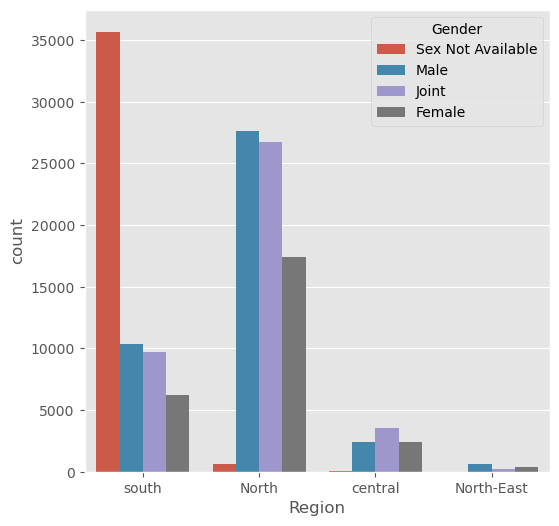

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='Region', data = df, hue = 'Gender')
plt.show()

In [19]:
df['Region'].value_counts()

North         72410
south         61922
central        8404
North-East     1206
Name: Region, dtype: int64

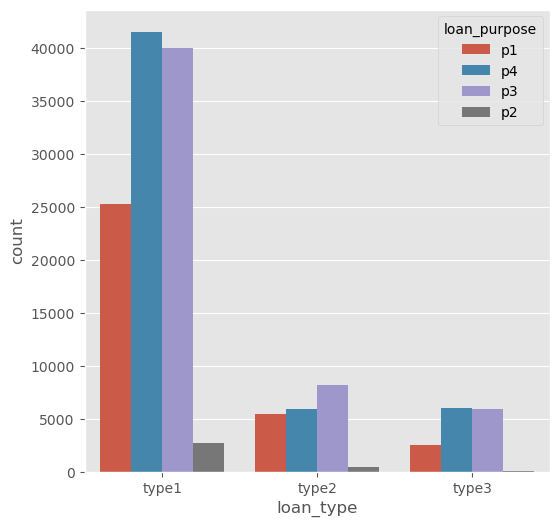

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='loan_type', data = df, hue = 'loan_purpose')
plt.show()

In [21]:
df['loan_type'].value_counts()

type1    109653
type2     19915
type3     14374
Name: loan_type, dtype: int64

<AxesSubplot:xlabel='Credit_Score', ylabel='LTV'>

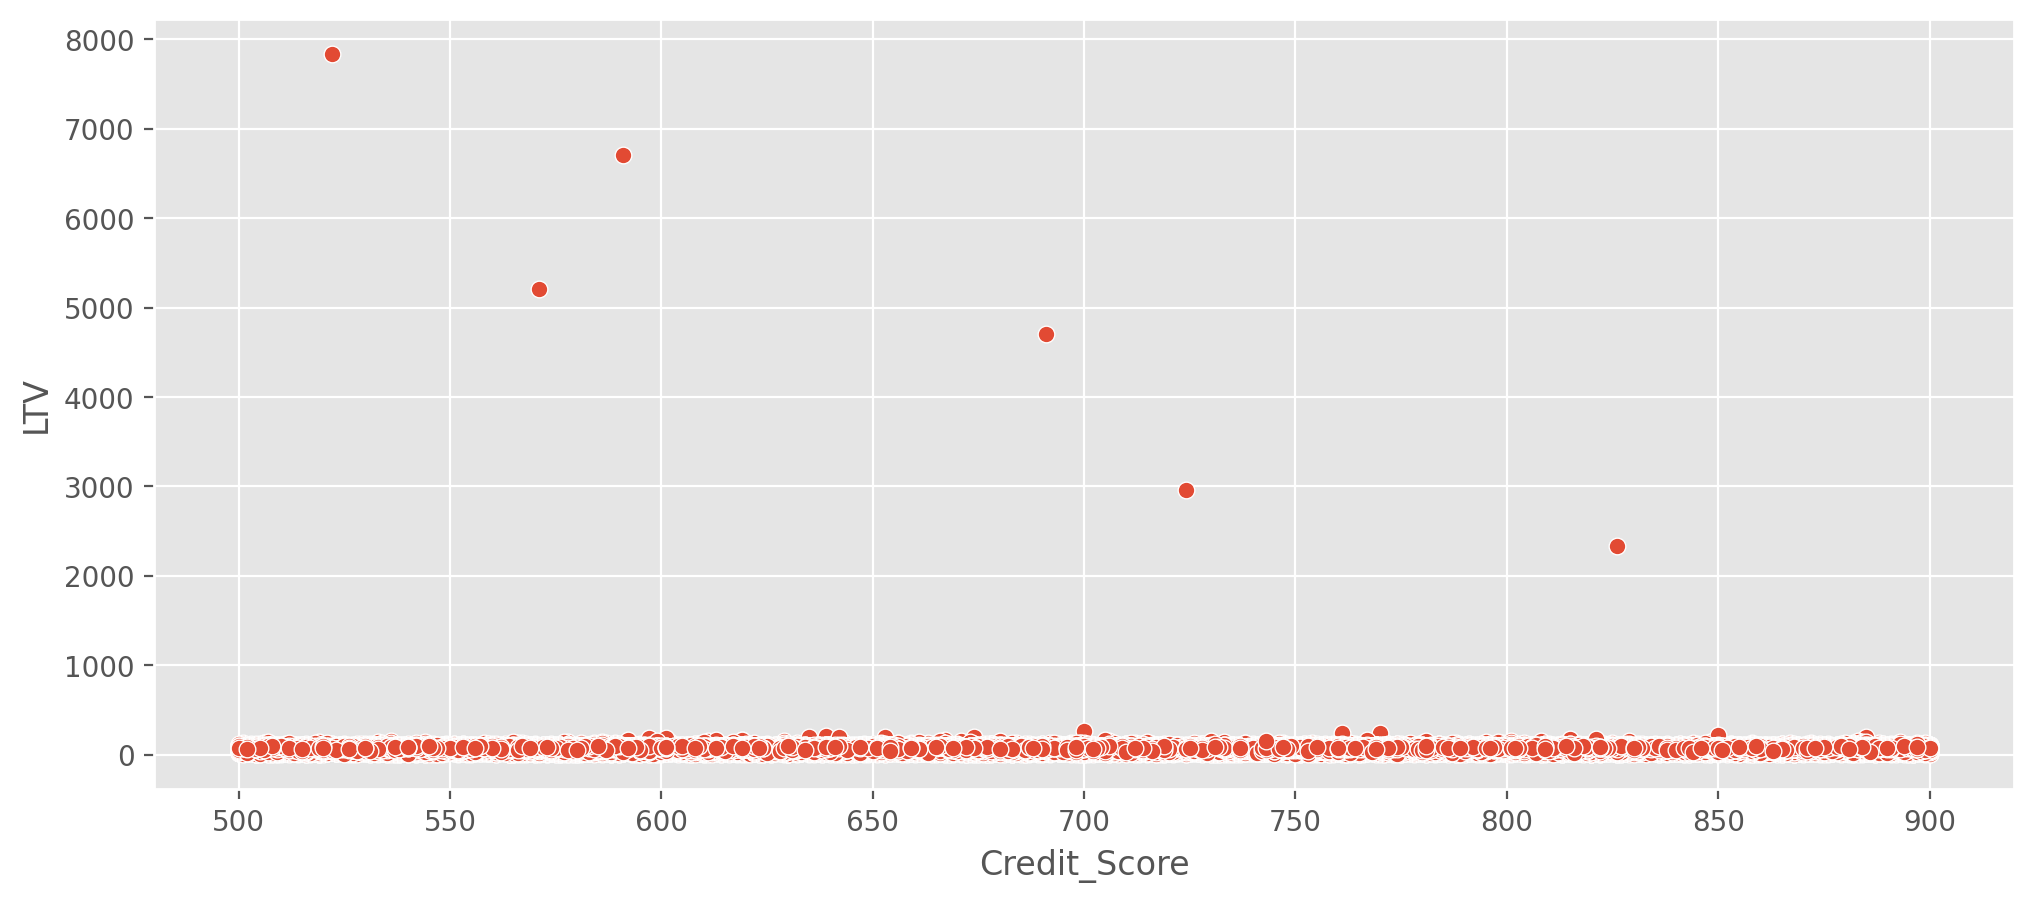

In [22]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('Credit_Score', 'LTV', data = df)

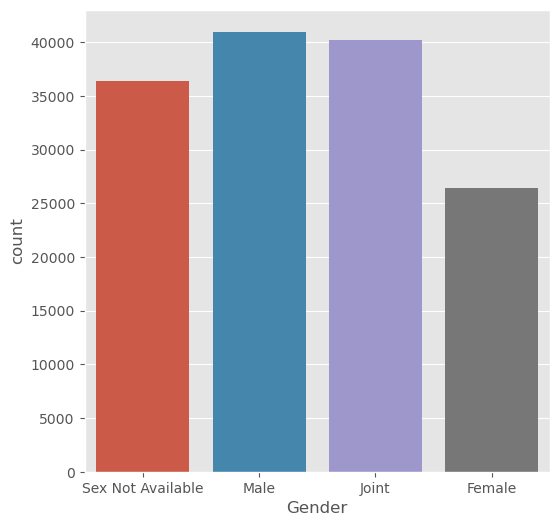

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender', data = df)
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
df['loan_limit']=le.fit_transform(df['loan_limit'])
df['Gender']=le.fit_transform(df['Gender'])
df['approv_in_adv']=le.fit_transform(df['approv_in_adv'])
df['approv_in_adv']=le.fit_transform(df['approv_in_adv'])
df['loan_purpose']=le.fit_transform(df['loan_purpose'])
df['Credit_Worthiness']=le.fit_transform(df['Credit_Worthiness'])
df['open_credit']=le.fit_transform(df['open_credit'])
df['business_or_commercial']=le.fit_transform(df['business_or_commercial'])
df['Neg_ammortization']=le.fit_transform(df['Neg_ammortization'])
df['interest_only']=le.fit_transform(df['interest_only'])
df['lump_sum_payment']=le.fit_transform(df['lump_sum_payment'])
df['construction_type'] =le.fit_transform(df['construction_type'])
df['occupancy_type']=le.fit_transform(df['occupancy_type'])
df['Secured_by']=le.fit_transform(df['Secured_by'])
df['total_units']=le.fit_transform(df['total_units'])
df['credit_type']=le.fit_transform(df['credit_type'])
df['co-applicant_credit_type']=le.fit_transform(df['co-applicant_credit_type'])
df['submission_of_application']=le.fit_transform(df['submission_of_application'])
df['Region']=le.fit_transform(df['Region'])
df['Security_Type']=le.fit_transform(df['Security_Type'])
df['loan_type']=le.fit_transform(df['loan_type'])

In [27]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,credit_type,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,0,3,0,0,0,0,0,1,...,1740.0,3,758,0,1,98.728814,3,1,1,45.000000
1,24891,2019,0,2,0,1,0,0,0,0,...,4980.0,2,552,1,1,72.746457,0,1,1,37.732932
2,24892,2019,0,2,1,0,0,0,0,1,...,9480.0,3,834,0,1,80.019685,3,1,0,46.000000
3,24893,2019,0,2,0,0,3,0,0,1,...,11880.0,3,587,0,0,69.376900,0,1,0,42.000000
4,24894,2019,0,1,1,0,0,0,0,1,...,10440.0,1,602,1,0,91.886544,0,1,0,39.000000


In [28]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
#x=df.drop(['Status','business_or_commercial','open_credit','Gender','year'],axis=1).values
x=df.drop(['Status','loan_limit','Gender'],axis=1).values
y=df['Status'].values


In [31]:
x.shape

(143942, 30)

In [32]:
df.head(2)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,credit_type,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,0,3,0,0,0,0,0,1,...,1740.0,3,758,0,1,98.728814,3,1,1,45.000000
1,24891,2019,0,2,0,1,0,0,0,0,...,4980.0,2,552,1,1,72.746457,0,1,1,37.732932


In [33]:
y[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt_model=DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [37]:
y_pred=dt_model.predict(x_test)
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32636
           1       1.00      1.00      1.00     10547

    accuracy                           1.00     43183
   macro avg       1.00      1.00      1.00     43183
weighted avg       1.00      1.00      1.00     43183



In [38]:
#Regularization 
from sklearn.linear_model import Ridge

In [39]:
l2_model=Ridge(alpha=0.2)
l2_model.fit(x_train,y_train)
score=l2_model.score(x_test,y_test)
print(f'score: {score}')

score: 0.12157610587665113


In [40]:
#Cross Validation 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression

In [41]:
k_5_fold=KFold(n_splits=5,shuffle=True,random_state=0)
lm=LinearRegression()

In [42]:
scores=cross_val_score(lm,x_train,y_train,cv=k_5_fold)
scores

array([0.1191728 , 0.11861144, 0.12080386, 0.1193524 , 0.12115018])

### KNN Model 

In [43]:
x=df.drop(['Status','loan_limit','Gender'],axis=1).values
y=df['Status'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
y_pred=knn_model.predict(x_test)
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     32636
           1       0.65      0.51      0.57     10547

    accuracy                           0.81     43183
   macro avg       0.75      0.71      0.73     43183
weighted avg       0.80      0.81      0.81     43183



### Accuracy for the KNN model is 81%